<a href="https://colab.research.google.com/github/Sbaig3229/ANN-and-decision-tree-comparision-using-ROC-curve/blob/main/ANN%20vs%20Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Artificial Neural Network V/S Decision Tree**

Neural Network is an algorithm inspired by biological neural networks. The MLP consists of connected graph of processing units that mimic the neurons. The connections between neurons are so-called weights. Their values are selected during the training process. The training goal is to minimize the error between values predicted by MLP and true values whereas decision Tree is a supervised algorithm used in machine learning. It is using a binary tree graph (each node has two children) to assign for each data sample a target value. The target values are presented in the tree leaves. To reach the leaf, the sample is propagated through nodes, starting at the root node. In each node a decision is made, to which descendant node it should go. A decision is made based on the selected sample’s feature.

Artificial Neural Network
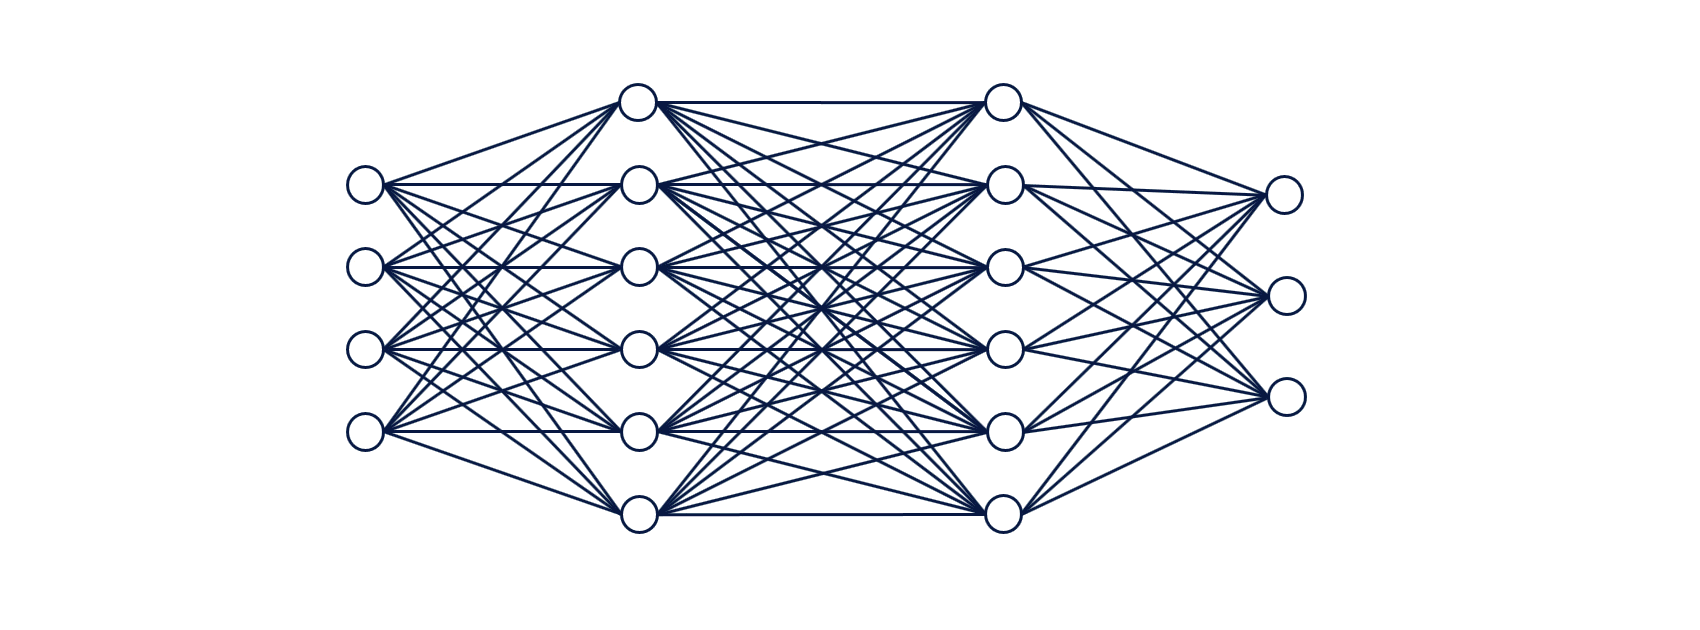

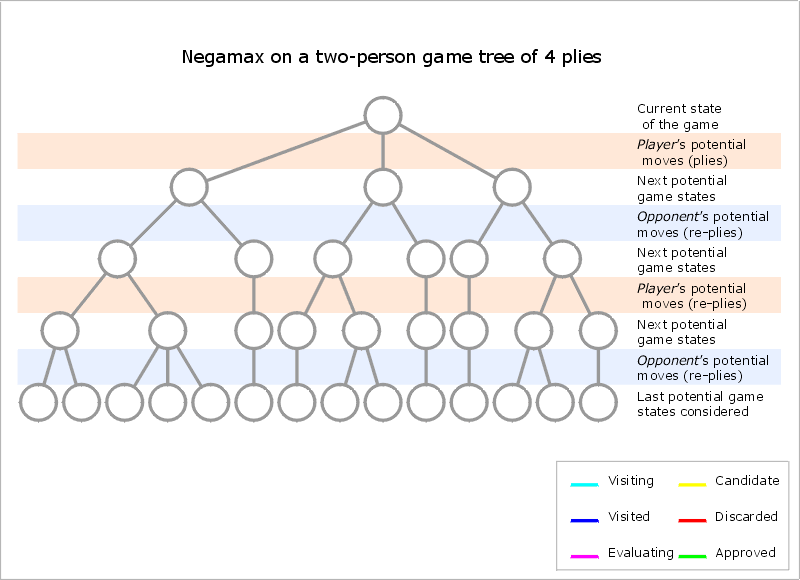

Importing the required libraries for ANN model to implement

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

Now are are importing data using panda

In [ ]:
data=pd.read_csv('voice.csv')

Now lets check our data

In [ ]:
data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [ ]:
data.shape

(3168, 21)

Cleaning null values from dataset

In [ ]:
data=data.dropna()

Assigning data to features and label for training

In [ ]:
labels=data['label']
features= data.drop(columns=['label'])

In [ ]:
features=pd.get_dummies(features)
features

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [ ]:
n_class=features.shape[1]

Declaring the data-types for values

In [ ]:
features=features.values.astype('float32')
labels=labels.values.astype('float32')


Test-train split in 80-20 ratio

In [ ]:
feature_test,feature_train,labels_test,labels_train = train_test_split(features, labels, test_size=0.2)

Defining model(Adding input layer, hidden layers and output layer)

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(32, input_shape=(20,)),
                          keras.layers.Dense(28, activation=tf.nn.relu),
                          keras.layers.Dense(24, activation=tf.nn.relu),
                          keras.layers.Dense(20, activation=tf.nn.relu),
                          keras.layers.Dense(16, activation=tf.nn.relu),
                          keras.layers.Dense(12, activation=tf.nn.relu),
                          keras.layers.Dense(8, activation=tf.nn.relu),
                          keras.layers.Dense(4, activation=tf.nn.relu),
                          keras.layers.Dense(2,activation='softmax')])

Defining model characteristics

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Training model with 3000 epochs

In [ ]:
model_fit=model.fit(feature_train, labels_train, epochs=3000)

Streaming output truncated to the last 5000 lines.
20/20 [==============================] - 0s 3ms/step - loss: 0.0591 - acc: 0.9795
Epoch 502/3000
20/20 [==============================] - 0s 2ms/step - loss: 0.0479 - acc: 0.9858
Epoch 503/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.0539 - acc: 0.9763
Epoch 504/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.0453 - acc: 0.9874
Epoch 505/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.0531 - acc: 0.9826
Epoch 506/3000
20/20 [==============================] - 0s 2ms/step - loss: 0.0707 - acc: 0.9779
Epoch 507/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.0556 - acc: 0.9779
Epoch 508/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.0509 - acc: 0.9779
Epoch 509/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.0572 - acc: 0.9858
Epoch 510/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.0517 - acc: 0

Predicting and evaluating the model performance

In [ ]:
prediction_features=model.predict(feature_test)
print(prediction_features[:20])
performance=model.evaluate(feature_test,labels_test)
print (performance)

[[9.9875081e-01 1.2491834e-03]
 [9.9999869e-01 1.2829231e-06]
 [6.2782514e-01 3.7217486e-01]
 [4.3841850e-09 1.0000000e+00]
 [9.9999821e-01 1.7402560e-06]
 [9.5732457e-11 1.0000000e+00]
 [9.9999774e-01 2.3050854e-06]
 [2.9353848e-07 9.9999976e-01]
 [9.2299683e-03 9.9077004e-01]
 [7.4553442e-01 2.5446558e-01]
 [9.9999857e-01 1.3782144e-06]
 [9.3145491e-10 1.0000000e+00]
 [7.1653683e-11 1.0000000e+00]
 [9.9988663e-01 1.1331409e-04]
 [1.3985042e-08 1.0000000e+00]
 [1.3387538e-01 8.6612457e-01]
 [9.9999964e-01 3.7783894e-07]
 [9.9999523e-01 4.7260100e-06]
 [9.9999976e-01 1.8798379e-07]
 [1.3626684e-01 8.6373323e-01]]
80/80 [==============================] - 0s 1ms/step - loss: 0.3044 - acc: 0.9519
[0.3044310510158539, 0.9518547654151917]


ANN has output of 2 neurons, due binary class i.e {1,0} and due to which the prediction matrix is of shape (2534,2), but it cannot be used to draw ROC curve as label_test has shape of (2534,), so we used flatten('F') function of numpy which merge the matrix in 1D keeping the order of the matrix giving the shape of (5068,), after which based on which we classified the class in 1, 0 with threshold of 0.5 and by using anyone of the binary class we can draw ROC curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
prediction_features=prediction_features.flatten('F')
labels_test=labels_test.flatten()
print(prediction_features[:20])

[9.9875081e-01 9.9999869e-01 6.2782514e-01 4.3841850e-09 9.9999821e-01
 9.5732457e-11 9.9999774e-01 2.9353848e-07 9.2299683e-03 7.4553442e-01
 9.9999857e-01 9.3145491e-10 7.1653683e-11 9.9988663e-01 1.3985042e-08
 1.3387538e-01 9.9999964e-01 9.9999523e-01 9.9999976e-01 1.3626684e-01]


In [ ]:
prediction_features=prediction_features[2534:5068]
print(prediction_features[:20])

[1.2491834e-03 1.2829231e-06 3.7217486e-01 1.0000000e+00 1.7402560e-06
 1.0000000e+00 2.3050854e-06 9.9999976e-01 9.9077004e-01 2.5446558e-01
 1.3782144e-06 1.0000000e+00 1.0000000e+00 1.1331409e-04 1.0000000e+00
 8.6612457e-01 3.7783894e-07 4.7260100e-06 1.8798379e-07 8.6373323e-01]


In [ ]:
prediction_features = (prediction_features > 0.5)*1


In [ ]:
print(prediction_features[:20])

[0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1]


In [ ]:
prediction_features.shape

(2534,)

In [ ]:
labels_test.shape

(2534,)

Using sklearn function for plotting roc curve

In [ ]:
fpr, tpr, thresholds = roc_curve(labels_test, prediction_features, pos_label=1)

In [ ]:
import matplotlib.pyplot as plt


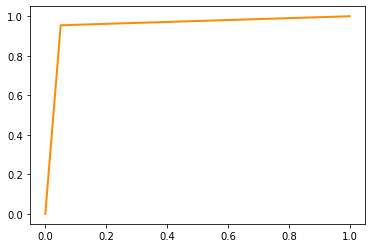

In [ ]:
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)

From there we will implement decision tree

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
classifier.fit(feature_train,labels_train)
predictions = classifier.predict(feature_test)
accuracy_score(y_true = labels_test, y_pred = predictions)

0.9518547750591949

using roc curve function, we will compute the ROC curve for decision tree as well

In [ ]:
fpr, tpr, thresholds = roc_curve(labels_test, predictions, pos_label=1)

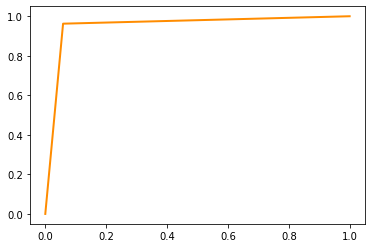

In [ ]:
import matplotlib.pyplot as plt
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)


**For this particular data, the roc curve seems to perform same as the threshold for both the cases are 0.1, but considering the accuracy, the ANN have the accuracy of 95.19% and the decision tree have the accuracy of 95.18%. But if we consider the time taken, then definately decision tree took, less time to gain that accuracy as the 3000 epochs took 4 minutes to be executed while the decision tree took fraction of seconds to be executed.**